<a href="https://colab.research.google.com/github/amiguelnobrega/AQI/blob/main/aqi3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Imports

In [1]:
# Import relevant packages.

import pandas as pd
import numpy as np

In [2]:
# Mount Google Drive in colab notebook

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [5]:
# Get .csv from gdrive

aqi = pd.read_csv('/content/gdrive/Othercomputers/My MacBook Air/Estudo/Google Advance DA/Projects/AQI/c4_epa_air_quality.csv')
print('done!')

done!


#2. Data Exploration

In [6]:
# Explore the `aqi` DataFrame.

print("Use describe() to summarize AQI")
print(aqi.describe(include='all'))

print("For a more thorough examination of observations by state use values_counts()")
print(aqi['state_name'].value_counts())

Use describe() to summarize AQI
        Unnamed: 0  date_local  state_name  county_name      city_name  \
count   260.000000         260         260          260            260   
unique         NaN           1          52          149            190   
top            NaN  2018-01-01  California  Los Angeles  Not in a city   
freq           NaN         260          66           14             21   
mean    129.500000         NaN         NaN          NaN            NaN   
std      75.199734         NaN         NaN          NaN            NaN   
min       0.000000         NaN         NaN          NaN            NaN   
25%      64.750000         NaN         NaN          NaN            NaN   
50%     129.500000         NaN         NaN          NaN            NaN   
75%     194.250000         NaN         NaN          NaN            NaN   
max     259.000000         NaN         NaN          NaN            NaN   

       local_site_name   parameter_name   units_of_measure  arithmetic_mean  \


## Observations:

- All of the sites collected data on January 1st, 2018.
- The minimum AQI value is 0 and the maximum AQI value is 50.
- Not all states are equally represented. California has 66 sites that reported AQI for this dataset, while states such as Delaware and Alabama have only one site that reported AQI.

#3. Statistical Tests

In [7]:
# Summarize the mean AQI for RRE States (Ripple Renewable Energy): `California`, `Florida`, `Michigan`, `Ohio`, `Pennsylvania`, `Texas`.

# Create a list of RRE states.

rre_states = ['California','Florida','Michigan','Ohio','Pennsylvania','Texas']

# Subset `aqi` to only consider these states.

aqi_rre = aqi[aqi['state_name'].isin(rre_states)]

# Find the mean aqi for each of the RRE states.

aqi_rre.groupby(['state_name']).agg({"aqi":"mean","state_name":"count"}) #alias as aqi_rre

,aqi,state_name
state_name,,
California,12.121212,66
Florida,5.500000,12
Michigan,8.111111,9
Ohio,3.333333,12
Pennsylvania,2.900000,10
Texas,2.700000,10


###Construct a boxplot visualization for the AQI of these states

In [8]:
# Import seaborn as sns.

import seaborn as sns

<Axes: xlabel='state_name', ylabel='aqi'>

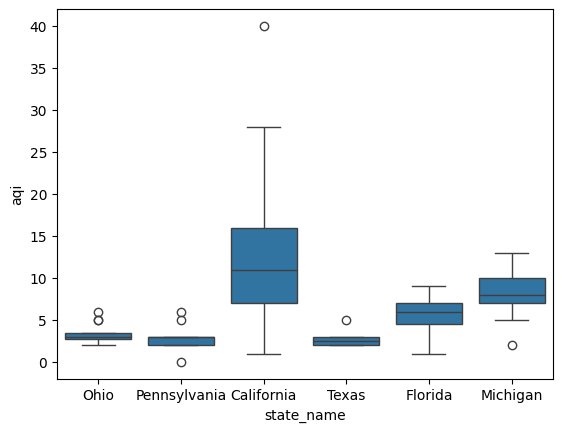

In [12]:
# Create an in-line visualization showing the distribution of aqi by state_nam

sns.boxplot(x=aqi_rre["state_name"],y=aqi_rre["aqi"])

### Construct a confidence interval for the RRE state with the highest mean AQI

Four-step process for constructing a confidence interval:

1.   Identify a sample statistic.
2.   Choose a confidence level.
3.   Find the margin of error.
4.   Calculate the interval.


In [13]:
# Construct sample statistic

aqi_ca = aqi[aqi['state_name']=='California']

sample_mean = aqi_ca['aqi'].mean()
sample_mean

12.121212121212121

In [ ]:
# Choose confidence level

confidence_level = 0.95
confidence_level

### Find the margin of error (ME)

**margin of error = z * standard error**, where z is the appropriate z-value for the given confidence level. To calculate the margin of error:

- Find the z-value.
- Find the approximate z for common confidence levels.
- Calculate the **standard error** estimate.

| Confidence Level | Z Score |
| --- | --- |
| 90% | 1.65 |
| 95% | 1.96 |
| 99% | 2.58 |

In [14]:
# Calculate the margin of error.

# Begin by identifying the z associated with the chosen confidence level.

z_value = 1.96

# Calculate the standard error.

standard_error = aqi_ca['aqi'].std() / np.sqrt(aqi_ca.shape[0])
print("standard error:")
print(standard_error)

# Lastly, use the preceding result to calculate the margin of error.

margin_of_error = standard_error * z_value
print("margin of error:")
print(margin_of_error)

standard error:
0.8987209641127412
margin of error:
1.7614930896609726


In [17]:
# Calculate the confidence interval (upper and lower limits).

upper_ci_limit = sample_mean + margin_of_error
lower_ci_limit = sample_mean - margin_of_error
(lower_ci_limit, upper_ci_limit)

(10.359719031551148, 13.882705210873095)

#4. Results and Evaluation

**Key takeaways:**

* Based on the mean AQI for RRE states, California and Michigan were most likely to have experienced a mean AQI above 10.
* Constructing a confidence interval allowed to estimate the sample mean AQI with a certain degree of confidence.